# Egg Price Analysis in the U.S (2015-2025)
*Adjusted for Inflation Using CPI (Real Price Analysis*

## 1. Introduction & Objectives
In this project, we analyze the average monthly prices of Grade A large eggs in the U.S. from 2015 to 2025.

Our goals are:
- To visualize the trends in egg prices over time.
- To adjust nominal prices for inflation using CPI data.
- To understand how the *real* cost of eggs has changed for customers.

We use CPI (Consumer Price Index) data to convert nominal prices into real 2025-equivalent dollars.

## 2. Dataset Overview

We are using two datasets:

- **Egg Price Dataset**: Average monthly retail price (in USD) of a dozen Grade A large eggs.
- **CPI Dataset**: Monthly Consumer Price Index for All Urban Consumers (CPI-U), not seasonally adjusted, U.S. city average.

Both datasets span from **January 2015 to the latest available month in 2025 (March)**

## 3. Analysis
### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Display settings for plots
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

### Loading the Egg Dataset + Preparation

In [6]:
# Egg Dataset
df_egg = pd.read_csv('data/egg_prices.csv')

# Set the date from 2015
df_egg = df_egg[df_egg['observation_date'] >= '2015-01-01']

df_egg.head()

,observation_date,APU0000708111
420,2015-01-01,2.113
421,2015-02-01,2.088
422,2015-03-01,2.133
423,2015-04-01,2.065
424,2015-05-01,1.962


In [8]:
# Renaming the Columns
df_egg.rename(columns={"observation_date": "Date", "APU0000708111": "Nominal_Price_USD"}, inplace=True)

# Reformat Date column to Datetime
df_egg["Date"] = pd.to_datetime(df_egg["Date"])

# Set Date column as index
df_egg.set_index("Date", inplace=True)

### Loading CPI dataset + Preparation

In [10]:
# Import the CPI Dataset
df_cpi = pd.read_excel("data/CPI-march2025.xlsx")

df_cpi.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,HALF1,HALF2
0,2015,233.707,234.722,236.119,236.599,237.805,238.638,238.654,238.316,237.945,237.838,237.336,236.525,236.265,237.769
1,2016,236.916,237.111,238.132,239.261,240.229,241.018,240.628,240.849,241.428,241.729,241.353,241.432,238.778,241.237
2,2017,242.839,243.603,243.801,244.524,244.733,244.955,244.786,245.519,246.819,246.663,246.669,246.524,244.076,246.163
3,2018,247.867,248.991,249.554,250.546,251.588,251.989,252.006,252.146,252.439,252.885,252.038,251.233,250.089,252.125
4,2019,251.712,252.776,254.202,255.548,256.092,256.143,256.571,256.558,256.759,257.346,257.208,256.974,254.412,256.903


In [11]:
# Drop the columns that are not needed
df_cpi = df_cpi.drop(columns=["HALF1", "HALF2"], errors="ignore")

In [12]:
# Transform Wide format to Long Format
cpi_long = df_cpi.melt(id_vars=["Year"], var_name="Month", value_name="CPI_All_Items")

In [13]:
# Filter out empty rows
cpi_long.dropna(subset=["CPI_All_Items"], inplace=True)

cpi_long

,Year,Month,CPI_All_Items
0,2015,Jan,233.707
1,2016,Jan,236.916
2,2017,Jan,242.839
3,2018,Jan,247.867
4,2019,Jan,251.712
...,...,...,...
126,2020,Dec,260.474
127,2021,Dec,278.802
128,2022,Dec,296.797
129,2023,Dec,306.746


In [14]:
# Convert month names into month numbers
month_map = {
    "Jan": 1, "Feb": 2, "Mar":3, "Apr": 4,
    "May": 5, "Jun": 6, "Jul": 7, "Aug": 8,
    "Sep": 9, "Oct": 10, "Nov": 11, "Dec": 12,
}

cpi_long["Month"] = cpi_long["Month"].map(month_map)

cpi_long

,Year,Month,CPI_All_Items
0,2015,1,233.707
1,2016,1,236.916
2,2017,1,242.839
3,2018,1,247.867
4,2019,1,251.712
...,...,...,...
126,2020,12,260.474
127,2021,12,278.802
128,2022,12,296.797
129,2023,12,306.746


In [16]:
# Create proper datetime index
cpi_long["Date"] = pd.to_datetime(dict(year=cpi_long.Year, month=cpi_long.Month, day=1))

# Set Date as index
cpi_long.set_index("Date", inplace=True)
cpi_long.sort_index(inplace=True)

cpi_long

,Year,Month,CPI_All_Items
Date,,,
2015-01-01,2015,1,233.707
2015-02-01,2015,2,234.722
2015-03-01,2015,3,236.119
2015-04-01,2015,4,236.599
2015-05-01,2015,5,237.805
...,...,...,...
2024-11-01,2024,11,315.493
2024-12-01,2024,12,315.605
2025-01-01,2025,1,317.671


In [17]:
cpi_df = cpi_long[["CPI_All_Items"]]

cpi_df

,CPI_All_Items
Date,
2015-01-01,233.707
2015-02-01,234.722
2015-03-01,236.119
2015-04-01,236.599
2015-05-01,237.805
...,...
2024-11-01,315.493
2024-12-01,315.605
2025-01-01,317.671


### Merging Eggs & CPI Datasets

In [18]:
df = df_egg.merge(cpi_df, left_index=True, right_index=True)
df.head()

,Nominal_Price_USD,CPI_All_Items
Date,,
2015-01-01,2.113,233.707
2015-02-01,2.088,234.722
2015-03-01,2.133,236.119
2015-04-01,2.065,236.599
2015-05-01,1.962,237.805


### Adjusting for Inflation (Real Price in March 2025)

In [19]:
latest_cpi = df["CPI_All_Items"].max()

df["Real_Price_USD"] = df["Nominal_Price_USD"] * (latest_cpi / df["CPI_All_Items"])

df.head()

,Nominal_Price_USD,CPI_All_Items,Real_Price_USD
Date,,,
2015-01-01,2.113,233.707,2.891378
2015-02-01,2.088,234.722,2.844813
2015-03-01,2.133,236.119,2.888930
2015-04-01,2.065,236.599,2.791157
2015-05-01,1.962,237.805,2.638488


In [24]:
# Changing the decimal in Real_Price_USD to 2 places
df["Real_Price_USD"] = df["Real_Price_USD"].round(2)

df.head()

,Nominal_Price_USD,CPI_All_Items,Real_Price_USD
Date,,,
2015-01-01,2.113,233.707,2.89
2015-02-01,2.088,234.722,2.84
2015-03-01,2.133,236.119,2.89
2015-04-01,2.065,236.599,2.79
2015-05-01,1.962,237.805,2.64


## 4. Visualization

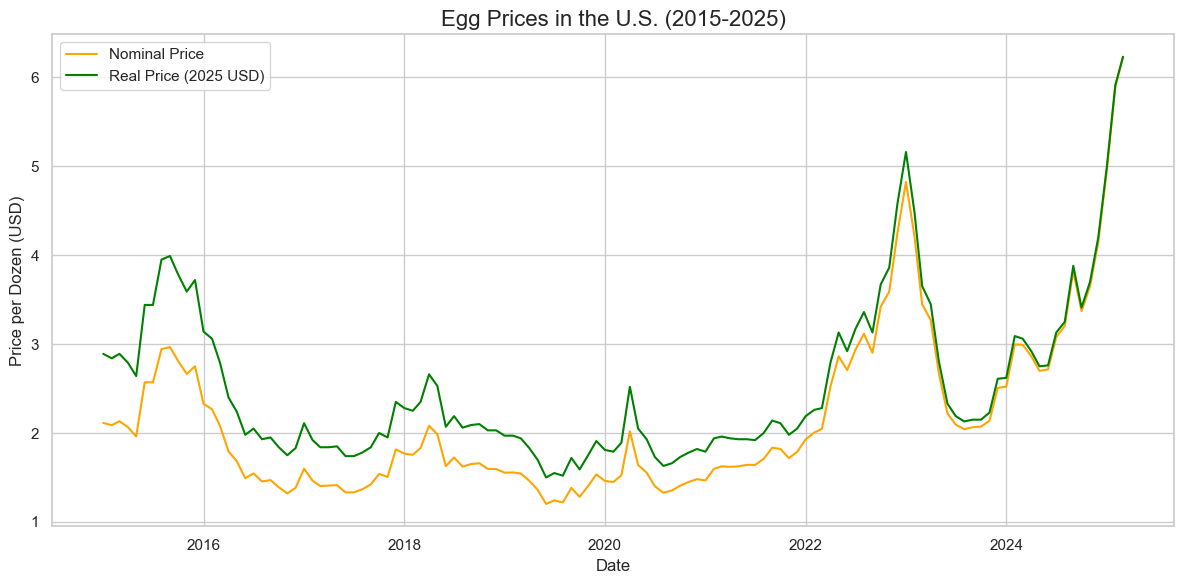

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Nominal_Price_USD"], label="Nominal Price", color="orange")
plt.plot(df.index, df["Real_Price_USD"], label="Real Price (2025 USD)", color="green")
plt.title("Egg Prices in the U.S. (2015-2025)", fontsize=16)
plt.ylabel("Price per Dozen (USD)")
plt.xlabel("Date")
plt.grid(True)
plt.legend()
plt.tight_layout()

# Save fig
plt.savefig("egg_price_analysis.png", dpi=300)

plt.show()

In [28]:
# Export adjusted dataset
df.reset_index().to_csv("egg_prices_real_adjusted.csv", index=False)

## 5. Insights

Between 2015 and 2021, U.S. egg prices (even after adjusting for inflation using CPI) remained relatively stable. However, starting in 2022, egg prices spiked dramatically—far outpacing CPI-adjusted expectations. This suggests egg-specific supply shocks, such as avian flu outbreaks or supply chain disruptions, rather than general inflation. Even by 2025, prices remain well above historical norms, implying a lasting shift in market dynamics.